In [1]:
#imorting libraries
import numpy as np
import pandas as pd
import matplotlib.patches as patches
import matplotlib.pylab as plt
import matplotlib.patches as patches
import nltk
import re
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from scipy import interp
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier


In [2]:
#reading data file
df =  pd.read_csv( 'Data.tsv', header = None, delimiter="\t")
df.columns = ['sentiment', 'tweet']
df.head()

,sentiment,tweet
0,neg,"@jamielewislewis i cant believe it, it really ..."
1,pos,having a vodka tonic and looking forward to go...
2,pos,@ddlovatofans1neg1 Could you follow me please....
3,pos,@jordanknight for once.................. PLEAS...
4,neg,Had a dream about a walk in fast food resturau...


In [3]:
stops = set(stopwords.words("english")) #load english words 

from nltk.stem import PorterStemmer
porter = PorterStemmer() #initiate stemmer

          
#some spelling correction or converting to meaningful representation. The main aim is to standardize frequent words in tweets.
#or it can be said it is manual stemming like converting "grrrrrrrr" to 'grr' or "grrrrrrr" to 'grr' . It will be helpful in
#Document to Term Matrix creation. Model will infer that certain word imply to sentiments.

explicit = { "haven't": "have not",
            "won't": "will not",  
            "i'm" : "i am", 
            "didn't" : "did not", 
            "don't" : "do not", 
            "isn't" : "is not", 
            "wasn't": "was not", 
            "weren't" : "were not", 
            "aren't" : "are not",  
            "couldn't" : "could not",
             "wouldn't" : "would not" , 
            "hasn't" : "has not", 
            "shalln't" : "shall not", 
            "can't" : "can not" , 
            "doesn't" : "does not",
             "it's" : "it is",
             "i've" :"i have" ,
            "i'd" :"i would" , 
            "he'll" : "he will",
            "she'll" : "she will",
            "you're" :"you are",
             "we're" :"we are",  
            "u're" : "you are",             
            "let's" : "let us" , 
            "we'll" : "we will", 
            "i'll" : "i will" , 
             "you'll" : "you will", 
            "that's" : "that is" ,   
            "y'all" :"you all",
             "li'l" :"little",
            
            "suuuupppeeeerrrrr" : "super",    
            "huuurrrttts" : "hurts",
            "grrrrrrrr" : "grr" ,     
            "grrrrrrr" : "grr",          
            "workin" : "working", 
            "hear'g" : "hearing", 
            "pleanty" : "plenty", 
            "suuuupppeeeerrrrr" : "super",     
            "updatessssssssssssssssssssssssssssssssssssssssssssssss" : "updates",
            "u've" :"you have",
            "boredddddddddd" :"bored",
            "daaaaaaang" :"dang",  
            "yeaaaaah" : "yeah",  
            'ughhh' : 'ugh',
            
            
            "plllleeeasseee" :"please",
            "yeeeeees" :"yes",
            "yummmmmmmmm" :"yummy",    
            "noooooooooooo" :"no", 
            "noooooooooo" :"no",
            "nooooooooo" :"no",    
            "noone" :"none",   
            "nooo" :"no",
            
            "hoooooooooooooooooooolla" :"hello",   
            "aaaaaammmazzzingggg" :"amazing",
            "helllllo" :"hello",
            "loviiiiing" :"loving",
            
            "gaaaaaaaaaah" :"gah", #standardizing similar looking words to simple form
            "gaahhhhh" :"gah", 
            "gahh" :"gah",
            
            "xxxxxxxxxx" : "xx", #standardizing similar looking words to simple form
            "xxxxxx" : "xx", 
            "xxxxx" : "xx",
            "xxxx" : "xx", 
            "xxx" : "xx",  
            
            "niceeeeeeeee" :"nice",
            "wellllllll" :"well",
            
            "gooooodmorning" :"good morning",
            "loveletter" : "love letter",    
            "betterrrrr" :"better",
            "goooooood" : "good", 
            "mmmmm" :"",
            "xoxox" :"xoxo",
            
            "awwww" :"aww", #standardizing similar looking words to simple form
            "awww" :"aww",
            
            "hehehe" :"hehe",    
            "wooooow" :"wow",
            "looooove" :"love",
            "luckyyyy" :"lucky", 
            "crashiiinnnn" : "crashing",       
            "yearrrr" : "year",
            "overrrr" : "over",   
            "herrrr" : "her",
            "everrr" : "ever" ,     
            "girlllll" : "girl",  
            "alllll" : "all",  
            "alll" : "all",  
            "pleeease" :"please",        
            "historyyyy" : "history", 
            "easyyy" :"easy", 
            "moreeee" : "more", 
            "preetyy" : "preety", 
            "lolllll" : "lol",       
                   
            "sweeeet" : "sweet", 
            "gr8r" : "greater",         
            "poppin" : "popping", 
            "thatsss" : "that is", 
            
            "ggoodd" : "good",
            
            "omgosh" : "omg", #standardizing similar looking words to simple form
            "omggg" : "omg",
            "omgg" : "omg",
            
            "epik" : "epic",
            "goingg" : "going",
            "destroytwitter" : "destroy twitter", 
            "nowww" :"now", 
            
            "srsly" : "seriously", 
            "gooooo" :"go", 
            "fuckkinq" :"fucking",    
            "worssst" : "worst",
            "lazzzzybum" : "lazy bum",
            "aaaargh" :"argh",  
            "arghhhh" : "argh",  
            "arghh" : "argh",  
            "mornin'" :"morning",   
            "hurtss" :"hurts",  
            "thx" : "thanks", 
            "xoxox" : "xoxo",   
            "muahaha" : "xoxo",
            "wahahah" : "wow",    
            
            "sickk" : "sick", 
            "knoww" : "know", 
            "cryed" : "cried",
            "studiyn" : "studying",
            "badd" : "bad",
            "srry" : "sorry",
            "comfy" : "comfortable",
            
            "ahhhhhhhhhhhhhhh" : "ah",   #converting such occurences to simple representation like 'ah'                  
            "ahhhhhhhhhhhh" : "ah", 
            "aaahhhhhh" : "ah",
            "aaah" : "ah",
            "ahhhhh" : "ah", 
            "ahhhh" : "ah",
            "ahhh" : "ah",
            "ahh" : "ah",
            
            "yeahhhh" : "yeah",  
            

            "ahhhaaa" : "ah",
            "mooooore" :"more",    
            "cooool" : "cool", 
            "waitiinq" :"waiting",
            
            
            "nighhht" : "night",
            "supportin'" : "supporting",
            "ohwell" : "oh well",  
            "seddd" : "said",
            "thankyou" : "thank you",
            "friendd" : "friend",  
            "evenn" : "even",
            
            "wayy" : "way",
            
            "soooooooo" :"so", #standardizing similar looking words to simple form
            "soooooo" : "so",
            "sooooon" :"soon",
            "soooorry" :"sorry",
            "soooo" : "so",
            "sooo" :"so",      
            
             "briinq" : "bring",  
             
             "lmaooo" : "lmao",
             "swesome" : "awesome",
            "thankz" : "thanks",
            "doneee" : "done",
            "tummmyyy" : "tummy",
            "fucken" : "fucking",
            "treatin" : "treating",    
            "freaken" : "freaking",
            "jammin" : "jamming",
            "dumm" : "dumb",
            "thiss" : "this",
            "thatt" : "that", 
            "lotsa" : "lots of",
            "fooking" : "fucking ",
            "rockin" : "rocking",
            "acctually" : "actually", 
            "quittin'" : "quitting",
            "hmmmmm" : "hmm",  #standardizing similar looking words to simple form
            "hmmmm" : "hmm",         
            "hmmm" : "hmm",
            
            "lmao" : "haha", #standardizing similar meaning words to other more frequent form
            "rofl" :  "haha",
            
            "omfg" : "oh my fucking god", 
            "heeelp" : "help",
            "shortt" : "short",
            'yippieee' : 'yippie',
            'yippy' : 'yippie',
            
            'heehee' : 'hehe',
            'shaddaaaaap' : 'shut up',
            'hahaahahahaha' : 'haha',
            'excitedd' : 'excited',
            'iamsoannoyed' : 'i am so annoyed',
            'illiegal': 'illegal',
            'longg' : 'long',
            'ischill' : 'is chill',
            'mashallah' : 'god has willed it',
            'alhamdulillah' : 'praise be to God',
            'saddned' : 'saddened',
            'slaggin' : 'slagging',
            'waaaaay' : 'way', #standardizing similar looking words to simple form
            
            'hawt' :  'hot',
            'yeahh' : 'yeah' ,
            'ooohh' : 'oh',  #standardizing similar looking words to simple form
            'oohh'  : 'oh',
            'bahaha' : 'haha',
            'missfabulous' : 'miss fabulous'
           }    
    


In [4]:
# use these three lines to do the replacement
rep = dict((re.escape(k), v) for k, v in explicit.items()) 
pattern = re.compile("|".join(rep.keys()))

stops -= {'not', 'no', 'none'} #discarding negative terms


def review_to_wordlist( review):
    review_text = review.lower()
    review_text = pattern.sub(lambda m: explicit[re.escape(m.group(0))], review_text) #since such replacement can replace letters
    #inside a word . So,we will separately convert some words to simple representation
    review_text = re.sub(r"\bhavent\b", 'have not', review_text)
    review_text = re.sub(r"\bwont\b", 'will not', review_text)
    review_text = re.sub(r"\bim\b", "i am", review_text)
    review_text = re.sub(r"\bdidnt\b", "did not", review_text)
    review_text = re.sub(r"\bdont\b", "do not", review_text)
    review_text = re.sub(r"\bisnt\b", 'is not', review_text)
    review_text = re.sub(r"\bwasnt\b", "was not", review_text)
    review_text = re.sub(r"\bwerent\b", "were not", review_text)
    review_text = re.sub(r"\barent\b", "are not", review_text)
    review_text = re.sub(r"\bcouldnt\b", "could not", review_text)
    review_text = re.sub(r"\bwouldnt\b", "would not", review_text)
    review_text = re.sub(r"\bhasnt\b", "has not", review_text)
    review_text = re.sub(r"\bshallnt\b",  "shall not", review_text)
    review_text = re.sub(r"\bshant\b", "shall not", review_text)
    review_text = re.sub(r"\bcant\b", "can not", review_text)
    review_text = re.sub(r"\bdoesnt\b", "does not", review_text)
    review_text = re.sub(r"\bits\b",  "it is", review_text)
    review_text = re.sub(r"\byoure\b", "you are", review_text)
    review_text = re.sub(r"\byall\b", "you all", review_text)
    review_text = re.sub(r"\blets\b", "let us", review_text)
    review_text = re.sub(r"\bhahaha\b", "haha", review_text)
    review_text = re.sub(r"\bahaha\b", "haha", review_text) 
    review_text = re.sub(r"\bhahaa\b", "haha", review_text)
    review_text = re.sub(r"\bahahaha\b", "haha", review_text)
    review_text = re.sub(r"\bhahaahahahahha\b", "haha", review_text)
    review_text = re.sub(r"\bhahah\b", "haha", review_text)
    review_text = re.sub(r"\bhahahaha\b", "haha", review_text)
    review_text = re.sub(r"\bhahahah\b", "haha", review_text)
    review_text = re.sub(r"\bhahah\b", "haha", review_text)
    review_text = re.sub(r"\bhahha\b", "haha", review_text)
    review_text = re.sub(r"\bhaha\b", "ha", review_text) 
    review_text = re.sub(r"\baw\b", "aww", review_text)
    
    review_text = re.sub(r"\bsoo\b", "so", review_text) 
    review_text = re.sub(r"\bahaha\b", "haha", review_text)  
    review_text = re.sub(r"\bahha\b", "ah", review_text)  
    review_text = re.sub(r"\baaand\b", "and", review_text)  
    review_text = re.sub(r"\blistenin\b", "listening", review_text)  
    review_text = re.sub(r"\bdyin\b", "dying", review_text)  
    review_text = re.sub(r"\byoou\b", "you", review_text) 
    review_text = re.sub(r"\bfeelin\b", "feeling", review_text) 
    review_text = re.sub(r"\bhah\b", "ha", review_text) 
    review_text = re.sub(r"\blil\b", "little", review_text)  
    review_text = re.sub(r"\blovin\b", "loving", review_text) 
    review_text = re.sub(r"\bbetcha\b", "bet you", review_text) 
    review_text = re.sub(r"\bcrampsss\b", "cramps", review_text)    
    review_text = re.sub(r"\bcuz\b", "because", review_text) 
    review_text = re.sub(r"\bcoz\b", "because", review_text) 
    review_text = re.sub(r"\bcos\b", "because", review_text)  
    review_text = re.sub(r"\byum\b", "yummy", review_text) 
    review_text = re.sub(r"\bx\b", "xx", review_text)   
    review_text = re.sub(r"\bgr\b", "grr", review_text) 
    
    review_text = re.sub(r"\bwatchin\b", "watching", review_text)   
    review_text = re.sub(r"\bfreezin\b", "freezing", review_text) 
    review_text = re.sub(r"\bflickin\b", "flicking", review_text) 
    review_text = re.sub(r"\blearnin\b", "learning", review_text) 
    review_text = re.sub(r"\bworkin\b", "working", review_text)  
    review_text = re.sub(r"\bwaitin\b", "waiting", review_text) 
    review_text = re.sub(r"\boverr\b", "over", review_text)
    review_text = re.sub(r"\bu\b", "you", review_text)
    review_text = re.sub(r"\br\b", "are", review_text)
    review_text = re.sub(r"\bpls\b", "please", review_text) 
    
    review_text = re.sub(r"\bya\b", "you", review_text)
    review_text = re.sub(r"\bstayin\b", "staying", review_text)
    review_text = re.sub(r"\bans\b", "answer", review_text) 
    review_text = re.sub(r"\bplz\b", "please", review_text)
    review_text = re.sub(r"\bhm\b", "hmm", review_text)
    review_text = re.sub(r"\bo\b", "oh", review_text)     
    review_text = re.sub(r"\bwastin\b", "wasting", review_text)
    review_text = re.sub(r"\bboooo\b", "boo", review_text)
    review_text = re.sub(r"\bbooo\b", "boo", review_text)    
    review_text = re.sub(r"\bwoooh\b", "woohoo", review_text)  
    review_text = re.sub(r"\bhahahah\b", "haha", review_text)    
    review_text = re.sub(r"\boo\b", "oh", review_text)   
    review_text = re.sub(r"\bohh\b", "oh", review_text) 
    review_text = re.sub(r"\booh\b", "oh", review_text)
    review_text = re.sub(r"\bty\b", "thank you", review_text)
    review_text = re.sub(r"\blols\b", "lol", review_text)    
    review_text = re.sub(r"\bgodd\b", "god", review_text)  
    review_text = re.sub(r"\bwaaaa\b", "wa", review_text) 
    review_text = re.sub(r"\bwaah\b", "wah", review_text)  
    review_text = re.sub(r"\bwoaa\b", "woah", review_text) 
    review_text = re.sub(r"\bhoot\b", "hot", review_text) 
    
    review_text = re.sub(r"\bhv\b", "have", review_text) 
    review_text = re.sub(r"\bfavs\b", "fave", review_text) 
    
    review_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",review_text).split())
    review_text = review_text.strip()
    review_text = review_text.split()   
    review_text  = [porter.stem(token) for token in review_text]
    words = [w for w in review_text if not w in stops]    
    text = " ".join(words)
    return(text)  

In [5]:
df.tweet.iloc[16] = 'inconvenience is regretted' #16th column is hindi

df['Processed_tweets'] = df.tweet.apply(lambda x: review_to_wordlist(x))
df.head()

,sentiment,tweet,Processed_tweets
0,neg,"@jamielewislewis i cant believe it, it really ...",not believ realli doe not belong hope doe not ...
1,pos,having a vodka tonic and looking forward to go...,vodka tonic look forward go saddl ranch westga...
2,pos,@ddlovatofans1neg1 Could you follow me please....,could follow pleas would realli appreci
3,pos,@jordanknight for once.................. PLEAS...,onc pleas tell us whi think thi person
4,neg,Had a dream about a walk in fast food resturau...,dream walk fast food resturaunt sold ice cream...


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
sentences = list(df['Processed_tweets'])

In [7]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features= 1000, max_df = 0.5, smooth_idf=True)
X = vectorizer.fit_transform(sentences) #X is (2001, 1000) dimensionalsparse matrix
Y = pd.DataFrame(X.toarray()) #converting matrix to pandas dataframe
 

In [8]:
U, S, V = np.linalg.svd(Y) #SVD decompostion


In [9]:
# create m x n Sigma matrix
Sigma = np.zeros((Y.shape[0], Y.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:Y.shape[1], :Y.shape[1]] = np.diag(S)
# select top singular values
n_elements = 125

Sigma = Sigma[:, :n_elements] #creating new Sigma upto chosen number of singular values
VT = V[:n_elements, :]   #creating new Sigma upto chosen number of singular values  (top 125 rows)
 
B = U.dot(Sigma.dot(VT))


T = U.dot(Sigma)

# transform data to 125 dimension. This will be our new data.

T = Y.dot(VT.T)
print(T.shape)

(2001, 125)


0.7751236293097097


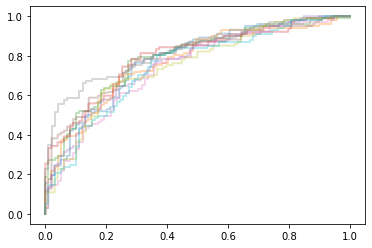

In [10]:
from sklearn.linear_model import LogisticRegression

cv = StratifiedKFold(n_splits=10,shuffle=False) #initiate f-fold cross validation object

logreg = LogisticRegression(solver = 'lbfgs')

feeling = {'pos': 1,'neg': 0}
df['newfeeling'] = [feeling[item] for item in df.sentiment] #converting 'sentiment' class to numeric

aucs = []
mean_fpr = np.linspace(0,1,100)
i = 1
x = pd.DataFrame(T)
y = df['newfeeling']

logreg = LogisticRegression(solver = 'lbfgs') #initiate logistic regression classifier

for train,test in cv.split(x,y):
    prediction = logreg.fit(x.iloc[train],y.iloc[train]).predict_proba(x.iloc[test]) #fitting logistic regression model on 
    #this particular training fold and get the probabilities for test fold
    fpr, tpr, t = roc_curve(y[test], prediction[:, 1]) #get false positive rate, true positive rate and thresholds
    roc_auc = auc(fpr, tpr) #get auc for this particular fold
    aucs.append(roc_auc) 
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
    
print(np.mean(aucs)) 